# Importing Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from os import makedirs
from os import listdir
import os
from shutil import copyfile
import zipfile
from matplotlib import pyplot as plt
from matplotlib.image import imread

Using TensorFlow backend.


In [2]:
#import training directory
direc='dogs-vs-cats/'  #main base directory
train_direc= direc+'train/'    #training directory
train_cats_dir= train_direc+'cats'      #training cats
train_dogs_dir= train_direc+'dogs'      #training dogs
train_cats_dir_list= os.listdir(train_cats_dir)
train_dogs_dir_list= os.listdir(train_dogs_dir)
print("Dogs Training Images: ",len(train_dogs_dir_list))
print("Cats Training Images: ",len(train_cats_dir_list))

Dogs Training Images:  11250
Cats Training Images:  11250


In [3]:
valid_direc= direc+'validation/'    #training directory
valid_cats_dir= valid_direc+'cats'      #training cats
valid_dogs_dir= valid_direc+'dogs'      #training dogs
valid_cats_dir_list= os.listdir(valid_cats_dir)
valid_dogs_dir_list= os.listdir(valid_dogs_dir)
print("Dogs Validation Images: ",len(valid_dogs_dir_list))
print("Cats Validation Images: ",len(valid_cats_dir_list))

Dogs Validation Images:  1250
Cats Validation Images:  1250


# Images Examples

In [4]:
indexes=np.random.randint(low=10,high=1000,size=10)

In [5]:
def show_images(direc,sub_dir):
    fig = plt.figure(figsize=(15,4))
    for i in range(10):
        path=direc+'/'+sub_dir[indexes[i]]
        dog_image=imread(path)
        fig.add_subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(dog_image)

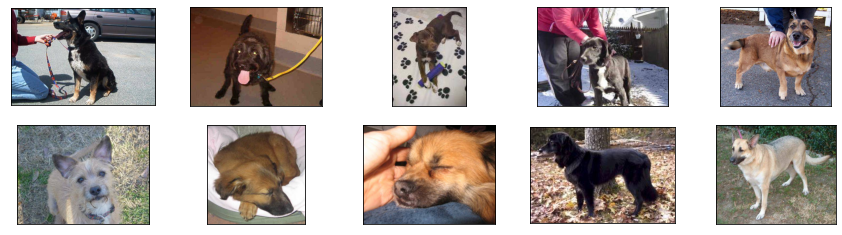

In [6]:
show_images(train_dogs_dir,train_dogs_dir_list)

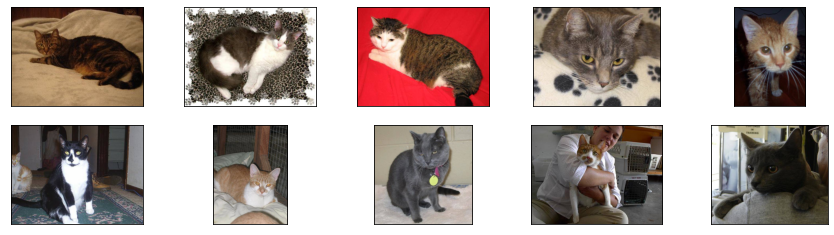

In [7]:
show_images(train_cats_dir,train_cats_dir_list)

# Image Generator Function

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Training Images
train_datagen =  ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_direc,
                                                    batch_size=25,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Validation Images
valid_datagen =  ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(valid_direc,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# Model 

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential(
    [Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3), kernel_initializer='he_uniform',padding='same',name='Conv_1'),
    MaxPooling2D(2,2,name="MaxPool_1"),
    BatchNormalization(name="Batch_Norm_1"),
    Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform',padding='same',name='Conv_2'),
    MaxPooling2D(2,2,name="MaxPool_2"),
    BatchNormalization(name="Batch_Norm_2"),
    Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform',padding='same',name='Conv_3'),
    MaxPooling2D(2,2,name="MaxPool_3"),
    BatchNormalization(name="Batch_Norm_3"),
    Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform',padding='same',name='Conv_4'),
    MaxPooling2D(2,2,name="MaxPool_4"),
    # Flatten the results to feed into a DNN
    Flatten(name='Flatten'), 
    # 512 neuron hidden layer
    Dense(256, activation='relu',kernel_initializer='he_uniform',name='Dense_1'),
    Dropout(0.2,name='Dropout_1'),
    Dense(128, activation='relu',kernel_initializer='he_uniform',name='Dense_2'),
    Dropout(0.25,name='Dropout_2'),
    Dense(64, activation='relu',kernel_initializer='he_uniform',name='Dense_3'),
    Dropout(0.25,name='Dropout_3'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    Dense(1, activation='sigmoid',name="Final_Layer") 
])
opt = keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 75, 75, 128)       0         
_________________________________________________________________
Batch_Norm_1 (BatchNormaliza (None, 75, 75, 128)       512       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 75, 75, 128)       147584    
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 37, 37, 128)       0         
_________________________________________________________________
Batch_Norm_2 (BatchNormaliza (None, 37, 37, 128)       512       
_________________________________________________________________
Conv_3 (Conv2D)              (None, 37, 37, 64)        7

In [15]:
history = model.fit(train_generator,epochs=25,
                   validation_data = valid_generator,
                    steps_per_epoch=250,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 79 steps
Epoch 1/25
250/250 [==============================] - 240s 959ms/step - loss: 0.6642 - accuracy: 0.5928 - val_loss: 0.6188 - val_accuracy: 0.6540
Epoch 2/25
250/250 [==============================] - 194s 776ms/step - loss: 0.6426 - accuracy: 0.6187 - val_loss: 0.5964 - val_accuracy: 0.6788
Epoch 3/25
250/250 [==============================] - 187s 746ms/step - loss: 0.6245 - accuracy: 0.6466 - val_loss: 0.5677 - val_accuracy: 0.7080
Epoch 4/25
250/250 [==============================] - 186s 746ms/step - loss: 0.6091 - accuracy: 0.6608 - val_loss: 0.5369 - val_accuracy: 0.7184
Epoch 5/25
250/250 [==============================] - 127s 508ms/step - loss: 0.5893 - accuracy: 0.6886 - val_loss: 0.5487 - val_accuracy: 0.7276
Epoch 6/25
250/250 [==============================] - 111s 445ms/step - loss: 0.5805 - accuracy: 0.6944 - val_loss: 0.5250 - val_accuracy: 0.7440
Epoch 7/25
250/250 [===========

In [ ]:
train_acc=history.history['accuracy']
train_loss=history.history['loss']

In [16]:
history_2 = model.fit(train_generator,epochs=10,
                   validation_data = valid_generator,
                    steps_per_epoch=250,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 79 steps
Epoch 1/10
250/250 [==============================] - 107s 428ms/step - loss: 0.4810 - accuracy: 0.7702 - val_loss: 0.4397 - val_accuracy: 0.7984
Epoch 2/10
250/250 [==============================] - 108s 433ms/step - loss: 0.4747 - accuracy: 0.7733 - val_loss: 0.4263 - val_accuracy: 0.8040
Epoch 3/10
250/250 [==============================] - 109s 436ms/step - loss: 0.4767 - accuracy: 0.7760 - val_loss: 0.4335 - val_accuracy: 0.8028
Epoch 4/10
250/250 [==============================] - 109s 436ms/step - loss: 0.4704 - accuracy: 0.7779 - val_loss: 0.4234 - val_accuracy: 0.8092
Epoch 5/10
250/250 [==============================] - 109s 437ms/step - loss: 0.4534 - accuracy: 0.7877 - val_loss: 0.4139 - val_accuracy: 0.8124
Epoch 6/10
250/250 [==============================] - 110s 440ms/step - loss: 0.4696 - accuracy: 0.7781 - val_loss: 0.3945 - val_accuracy: 0.8200
Epoch 7/10
250/250 [===========

In [17]:
history_3 = model.fit(train_generator,epochs=10,
                   validation_data = valid_generator,
                    steps_per_epoch=250)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 79 steps
Epoch 1/10
250/250 [==============================] - 108s 432ms/step - loss: 0.4472 - accuracy: 0.7883 - val_loss: 0.4002 - val_accuracy: 0.8160
Epoch 2/10
250/250 [==============================] - 110s 442ms/step - loss: 0.4452 - accuracy: 0.7955 - val_loss: 0.4133 - val_accuracy: 0.8052
Epoch 3/10
250/250 [==============================] - 112s 447ms/step - loss: 0.4437 - accuracy: 0.7930 - val_loss: 0.3879 - val_accuracy: 0.8284
Epoch 4/10
250/250 [==============================] - 112s 448ms/step - loss: 0.4249 - accuracy: 0.8112 - val_loss: 0.3634 - val_accuracy: 0.8384
Epoch 5/10
250/250 [==============================] - 112s 450ms/step - loss: 0.4457 - accuracy: 0.7914 - val_loss: 0.3898 - val_accuracy: 0.8212
Epoch 6/10
250/250 [==============================] - 112s 447ms/step - loss: 0.4385 - accuracy: 0.8000 - val_loss: 0.4029 - val_accuracy: 0.8232
Epoch 7/10
250/250 [===========

In [21]:
model.save('dogs_vs_cats.h5')

In [22]:
train_accuracy = history.history['accuracy']+history_2.history['accuracy']+history_3.history['accuracy']
valid_accuracy = history.history['val_accuracy']+history_2.history['val_accuracy']+history_3.history['val_accuracy']
train_loss = history.history['loss']+history_2.history['loss']+history_3.history['loss']
valid_loss = history.history['val_loss']+history_2.history['val_loss']+history_3.history['val_loss']

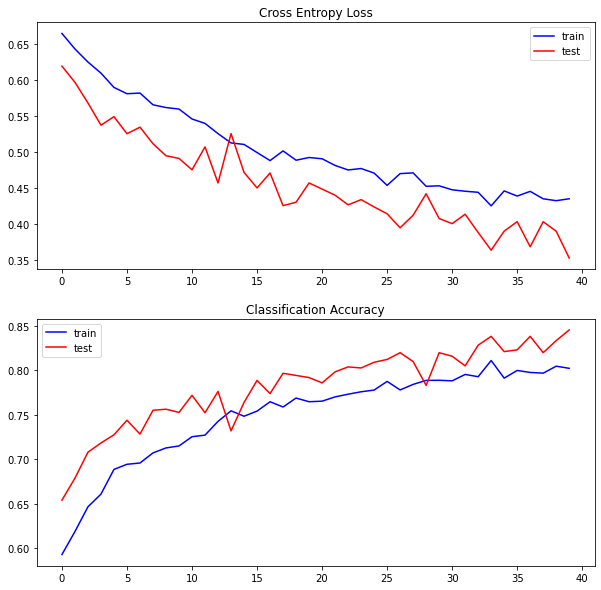

In [28]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(train_loss, color='blue', label='train')
plt.plot(valid_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(train_accuracy, color='blue', label='train')
plt.plot(valid_accuracy, color='red', label='test')
plt.legend()

# Predictions

In [50]:
def model_predict():    
    test_dir = direc+'test_dir'
    list_test_dir = os.listdir(test_dir)
    random = np.random.randint(low=0,high=12000,size=20)
    fig=plt.figure(figsize=(15,15))
    a=0
    for i in random:
        a+=1
        image = load_img(test_dir+'/'+list_test_dir[i],color_mode='rgb',target_size = (150,150))
        image_arr = np.array(img_to_array(image)).reshape(1,150,150,3)
        prediction = model.predict(image_arr/255.)
        fig.add_subplot(4,5,a)
        if prediction>0.5:
            plt.title("DOG")
        else:
            plt.title("CAT")
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)

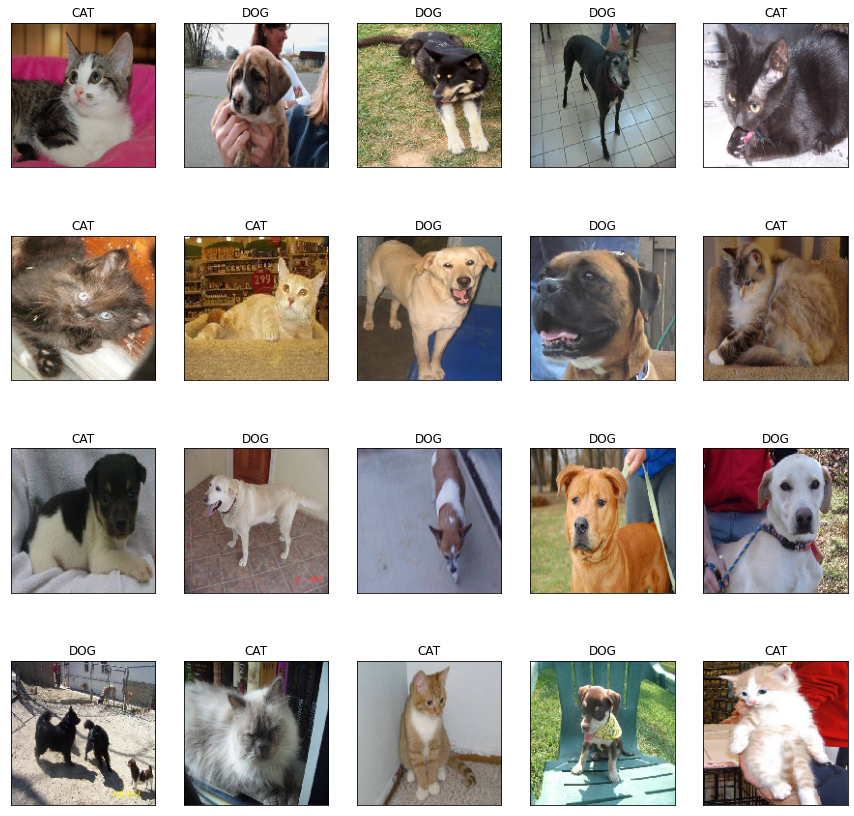

In [51]:
model_predict()

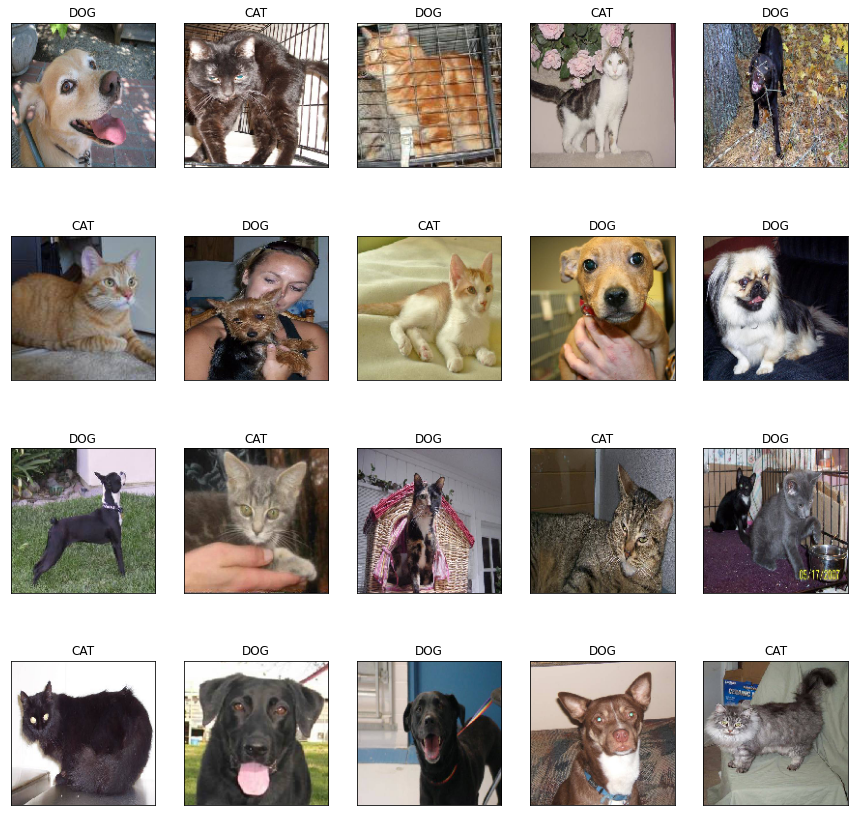

In [52]:
model_predict()